# Importing Libraries

In [1]:
# Import basic libraries 
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import seaborn as sn


# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics


# Importing the Dataset

In [2]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Project'

In [3]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70994,54108,1.244944,-0.829803,0.460412,-0.592892,-0.936679,0.256744,-0.788556,0.208520,-0.560602,...,-0.620086,-1.256141,0.149698,-0.305539,-0.006885,0.855623,-0.036221,-0.001662,34.99,0
70995,54110,1.228363,-0.154663,0.461158,-0.239120,-0.605993,-0.509623,-0.306561,0.008429,0.183887,...,-0.095011,-0.345760,0.030516,0.061763,0.118376,0.905945,-0.079622,-0.001290,20.32,0
70996,54110,-0.275451,0.858683,1.380908,1.889979,0.998702,1.604140,1.266506,-0.295361,-0.900884,...,-0.294209,-0.365963,-0.257802,-1.374944,-0.361560,-0.149056,-0.237424,-0.335412,108.77,0
70997,54110,-1.784254,-1.509458,2.026826,-1.731528,-1.496710,0.126131,1.052178,0.162145,1.628909,...,0.364428,0.636818,0.618648,0.437810,0.713999,0.084040,-0.062865,0.097839,400.00,0


# Data Visualization

In [4]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#viewing last 5 records
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70994,54108,1.244944,-0.829803,0.460412,-0.592892,-0.936679,0.256744,-0.788556,0.208520,-0.560602,...,-0.620086,-1.256141,0.149698,-0.305539,-0.006885,0.855623,-0.036221,-0.001662,34.99,0
70995,54110,1.228363,-0.154663,0.461158,-0.239120,-0.605993,-0.509623,-0.306561,0.008429,0.183887,...,-0.095011,-0.345760,0.030516,0.061763,0.118376,0.905945,-0.079622,-0.001290,20.32,0
70996,54110,-0.275451,0.858683,1.380908,1.889979,0.998702,1.604140,1.266506,-0.295361,-0.900884,...,-0.294209,-0.365963,-0.257802,-1.374944,-0.361560,-0.149056,-0.237424,-0.335412,108.77,0
70997,54110,-1.784254,-1.509458,2.026826,-1.731528,-1.496710,0.126131,1.052178,0.162145,1.628909,...,0.364428,0.636818,0.618648,0.437810,0.713999,0.084040,-0.062865,0.097839,400.00,0
70998,54110,-0.421514,1.029691,1.469883,0.146409,-0.128618,-0.841758,0.578926,0.085911,-0.289764,...,-0.212538,-0.555417,0.090637,0.528966,-0.337106,0.071839,0.256746,0.098170,2.69,0


In [6]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 70999 rows and 31 columns.


In [7]:
#Describing the Data
print(df.shape) 
print(df.describe()) 

(70999, 31)
               Time            V1            V2            V3            V4  \
count  70999.000000  70999.000000  70999.000000  70999.000000  70999.000000   
mean   34948.521402     -0.250046     -0.023747      0.679873      0.168406   
std    14490.482566      1.878939      1.662464      1.418487      1.374849   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    28881.500000     -1.009440     -0.593463      0.193633     -0.725538   
50%    38146.000000     -0.247280      0.072070      0.769823      0.186676   
75%    45883.500000      1.153563      0.727717      1.402496      1.051055   
max    54110.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  70999.000000  70999.000000  70999.000000  70999.000000  70999.000000   
mean      -0.271081      0.100263     -0.114874      0.056954      0.016963   
std        1.392332      1.307034      

# Data Visualization

Text(0, 0.5, 'Frequency')

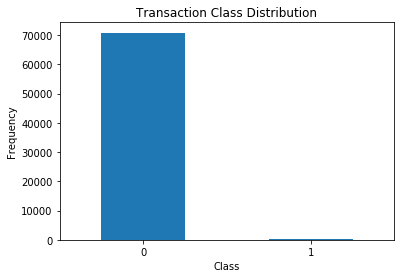

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [10]:
print(fraud.shape,normal.shape)

(177, 31) (70822, 31)


In [10]:
#We have to analyze more amount of information from the transaction data i.e fraud data
fraud.Amount.describe()

count     177.000000
mean       95.719153
std       219.167165
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [11]:
#normal data
normal.Amount.describe()

count    70822.000000
mean        97.013487
std        270.616091
min          0.000000
25%          7.680000
50%         26.500000
75%         88.447500
max      19656.530000
Name: Amount, dtype: float64

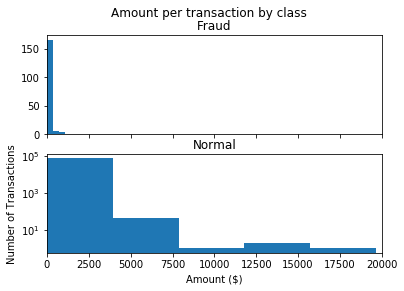

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 5
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

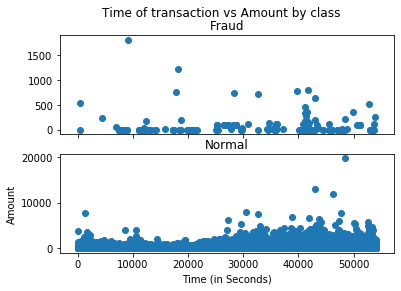

In [13]:
#here we are checking fraudulent transactions occur more often during certain time frame 
#visual representation
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# Taking care of Missing Data

In [14]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70999 entries, 0 to 70998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    70999 non-null  int64  
 1   V1      70999 non-null  float64
 2   V2      70999 non-null  float64
 3   V3      70999 non-null  float64
 4   V4      70999 non-null  float64
 5   V5      70999 non-null  float64
 6   V6      70999 non-null  float64
 7   V7      70999 non-null  float64
 8   V8      70999 non-null  float64
 9   V9      70999 non-null  float64
 10  V10     70999 non-null  float64
 11  V11     70999 non-null  float64
 12  V12     70999 non-null  float64
 13  V13     70999 non-null  float64
 14  V14     70999 non-null  float64
 15  V15     70999 non-null  float64
 16  V16     70999 non-null  float64
 17  V17     70999 non-null  float64
 18  V18     70999 non-null  float64
 19  V19     70999 non-null  float64
 20  V20     70999 non-null  float64
 21  V21     70999 non-null  float64
 22

In [15]:
#Get a count of missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df.isnull().values.any()

False

# Lable Encoding and One Hot Encoding

In [17]:
#For doing Label Encoding our dataset does not contain any textual data, so here Label Encoding is not necessary.

In [18]:
#For doing One Hot Encoding our dataset does not contains any textual data, so here One Hot Encoding is not necessary.

# Splitting the dataset

In [19]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  70822
Fraudulent transactions count:  177


In [20]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

In [21]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70994,54108,1.244944,-0.829803,0.460412,-0.592892,-0.936679,0.256744,-0.788556,0.208520,-0.560602,...,-0.491809,-0.620086,-1.256141,0.149698,-0.305539,-0.006885,0.855623,-0.036221,-0.001662,34.99
70995,54110,1.228363,-0.154663,0.461158,-0.239120,-0.605993,-0.509623,-0.306561,0.008429,0.183887,...,-0.018533,-0.095011,-0.345760,0.030516,0.061763,0.118376,0.905945,-0.079622,-0.001290,20.32
70996,54110,-0.275451,0.858683,1.380908,1.889979,0.998702,1.604140,1.266506,-0.295361,-0.900884,...,0.226220,-0.294209,-0.365963,-0.257802,-1.374944,-0.361560,-0.149056,-0.237424,-0.335412,108.77
70997,54110,-1.784254,-1.509458,2.026826,-1.731528,-1.496710,0.126131,1.052178,0.162145,1.628909,...,0.836480,0.364428,0.636818,0.618648,0.437810,0.713999,0.084040,-0.062865,0.097839,400.00


In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
70994    0
70995    0
70996    0
70997    0
70998    0
Name: Class, Length: 70999, dtype: int64

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
56214,47320,-0.977208,-0.715020,0.991558,-0.338610,-3.561373,2.196721,3.321789,-0.470672,0.433999,...,0.184493,-0.217142,-0.162125,0.500674,0.090820,-0.190979,0.880253,0.002095,-0.411701,784.05
10261,16096,-0.466083,1.545963,1.615077,2.640477,0.937084,1.355870,0.589888,-0.209382,0.815103,...,0.684458,-0.339927,0.136925,-0.376456,-0.972150,-0.109453,0.227244,0.290491,-0.127299,1.89
58871,48590,0.810050,-0.622881,1.108351,1.034473,-0.893494,0.710865,-0.748538,0.381730,0.501724,...,0.167474,0.397320,0.852808,-0.221281,-0.289182,0.243219,-0.236985,0.058386,0.052101,158.17
61282,49745,1.074545,0.222078,0.946793,2.793149,-0.473457,0.105358,-0.224959,0.195396,0.015132,...,-0.303322,-0.044166,0.003529,0.002586,0.383667,0.453013,0.091203,0.013703,0.018309,12.31
10582,17593,-6.968150,1.743432,-0.818903,-0.191471,-1.247237,1.809704,-0.669860,0.338209,4.005610,...,-1.264920,-0.099440,1.163857,-0.341736,-0.833561,-1.082645,0.615683,-6.695013,-2.519255,24.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,...,0.452662,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74
45891,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,...,0.173407,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12
42613,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,...,0.599251,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00
43567,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,...,-0.036664,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90


In [25]:
y_train

56214    0
10261    0
58871    0
61282    0
10582    0
        ..
21243    0
45891    0
42613    0
43567    0
68268    0
Name: Class, Length: 49699, dtype: int64

In [26]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
28662,35103,-0.338810,0.453426,1.061797,-1.578082,-0.381785,-1.274655,0.614706,-0.298889,0.610811,...,0.027472,0.088399,0.364363,-0.118158,0.456844,-0.440263,-0.010011,0.053734,0.139448,35.05
42551,41148,1.228991,-0.951533,-0.733934,-2.335520,1.123241,3.445061,-1.187868,0.956949,1.909861,...,0.127838,-0.101093,-0.239737,-0.091018,1.061971,0.533664,-0.025656,0.043495,0.026381,49.00
11544,19906,1.331903,-0.699999,0.455424,-0.471139,-0.817007,0.161310,-0.976859,0.179544,0.924629,...,-0.144298,-0.138750,-0.163937,-0.018793,-0.388178,0.402988,-0.243541,-0.014655,-0.014577,10.00
3442,2937,-0.458856,0.595401,1.173309,-2.148824,0.288287,-0.834071,0.975526,-0.152084,0.605299,...,-0.017947,0.149441,0.792564,-0.249870,0.220968,-0.067943,-0.838752,0.249682,-0.025900,1.00
52894,45704,-12.387813,-12.293557,-1.626694,2.903263,7.694575,-4.175100,-3.208047,-2.445043,1.034123,...,-4.916661,-3.313903,1.823124,9.801254,-1.331483,2.380641,1.012978,3.221839,-1.802061,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63031,50528,1.012461,-0.755676,1.799514,2.447405,-1.760054,0.472654,-1.117085,0.241888,-0.344629,...,-0.445629,-0.265871,-0.095536,-0.076201,0.726020,0.385821,0.199195,0.071679,0.053140,87.67
32319,36746,-0.561639,0.767676,0.816832,1.073118,-0.608695,0.073306,0.355362,0.616014,-0.836737,...,-0.008898,0.231941,0.322369,0.325059,0.171376,-0.411887,-0.422552,-0.066977,-0.019168,112.67
35729,38238,1.134980,-0.727165,1.282437,0.642479,-1.308270,0.661894,-1.185847,0.412603,-0.356676,...,-0.577990,-0.344395,-0.411711,0.090428,-0.039538,0.158220,-0.378503,0.100142,0.031178,29.50
5147,4861,-0.834234,1.130982,1.392738,1.591024,-0.174754,0.105675,0.179396,0.479806,0.801049,...,-0.139714,-0.112287,-0.098612,-0.091623,0.005469,0.093061,-0.225107,-0.018108,0.030541,37.26


In [27]:
y_test

28662    0
42551    0
11544    0
3442     0
52894    0
        ..
63031    0
32319    0
35729    0
5147     0
41659    0
Name: Class, Length: 21300, dtype: int64

# Feature Scaling

In [28]:
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print ("\nOriginal data values(x) : \n",  x) 
print ("\nOriginal data values(y) : \n",  y) 
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling(x) : \n", x_after_min_max_scaler) 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation(x) : \n", x_after_Standardisation)



Original data values(x) : 
 [[ 0.00000000e+00 -1.35980713e+00 -7.27811730e-02 ...  1.33558377e-01
  -2.10530530e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309900e-03
   1.47241690e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518410e-02  3.78660000e+02]
 ...
 [ 5.41100000e+04 -2.75450689e-01  8.58683053e-01 ... -2.37424123e-01
  -3.35411804e-01  1.08770000e+02]
 [ 5.41100000e+04 -1.78425375e+00 -1.50945768e+00 ... -6.28647400e-02
   9.78387550e-02  4.00000000e+02]
 [ 5.41100000e+04 -4.21514069e-01  1.02969092e+00 ...  2.56745989e-01
   9.81700460e-02  2.69000000e+00]]

Original data values(y) : 
 [0 0 0 ... 0 0 0]

After min max Scaling(x) : 
 [[0.00000000e+00 9.43114320e-01 7.92887897e-01 ... 4.41609368e-01
  2.20791504e-01 7.61171987e-03]
 [0.00000000e+00 9.86831151e-01 7.96587293e-01 ... 4.34375000e-01
  2.21614617e-01 1.36850197e-04]
 [1.84808723e-05 9.43139215e-01 7.79054596e-01 ... 4.3202161